In [1]:
import matplotlib.pyplot as plt; #plt.style.use('seaborn')
import numpy as np; np.random.seed(2)
import pandas as pd
from scipy import stats

$$\begin{array}{lll}
\mbox{Symetric Case}&&\\
\mbox{Confidence_Interval}_\theta 
&=&\hat{\theta}\pm\mbox{Margin_of_Error}_\theta\\
\\
\\
\mbox{Non-Symetric Case}&&\\
\mbox{Confidence_Interval}_\theta 
&=&(\mbox{Left}_\theta, \mbox{Right}_\theta)\\
&=&\mbox{Center}_\theta\pm\frac{\mbox{Right}_\theta-\mbox{Left}_\theta}{2}\\
&=&\mbox{Center}_\theta\pm\mbox{Margin_of_Error}_\theta
\end{array}$$

# T Cofidence Interval

$$
\bar{X}\pm t_*(n-1)\frac{S}{\sqrt{n}}
$$

$$\begin{array}{lllll}
(1)\ \mbox{Simple Random Sample}\\
(2)\ \mbox{Normal Condition}&&\mbox{Original is Normal}\\
(3)\ \mbox{Independence Condition}&&n < \mbox{10% of total population if chosen without repetition}\\
\end{array}$$

[Confidence interval](https://en.wikipedia.org/wiki/Confidence_interval)

In [2]:
def scatter(x, y_center, color, x_bar=None, width=None, text=None):
    plt.hlines(y_center, xmin=-4,              xmax=4,             alpha=1.0, color='black', ls='-')
    for i in range(-4,5):
        plt.vlines(i, ymin=-2e-2+y_center, ymax=2e-2+y_center, alpha=1.0, color='black', ls='-')
    plt.vlines(0, ymin=-40e-2+y_center, ymax=40e-2+y_center, alpha=1.0, color='black', ls='-')
        
    plt.scatter(x, np.ones_like(x)*y_center, color=color, s=100)
    
    if x_bar:
        plt.vlines(x_bar,       ymin=-7e-2+y_center, ymax=7e-2+y_center, alpha=1.0, color=color, ls='-', lw=5)
        
    if width:
        plt.vlines(x_bar+width, ymin=-7e-2+y_center, ymax=7e-2+y_center, alpha=0.7, color=color, ls='--')
        plt.vlines(x_bar-width, ymin=-7e-2+y_center, ymax=7e-2+y_center, alpha=0.7, color=color, ls='--')
    
    if text:
        arrowprops=dict(arrowstyle='<->', color='k', linewidth=3, mutation_scale=20)
        plt.annotate(text='',
                     xy=(x_bar-width,9e-2+y_center),
                     xytext=(x_bar+width,9e-2+y_center), 
                     arrowprops=arrowprops)
        plt.annotate(text=text,
                     xy=(x_bar,13e-2+y_center), 
                     xytext=(x_bar,13e-2+y_center),
                     fontsize=20)
        
    plt.xlim(-4,4)
    plt.ylim(-0.1,1)
    plt.axis('off');

In [3]:
x = np.random.normal(size=(5,))
x_bar = x.mean()
s = x.std()
n = x.shape[0]
t_star = stats.t(n-1).ppf(0.975)
width = t_star * s / np.sqrt(n) 

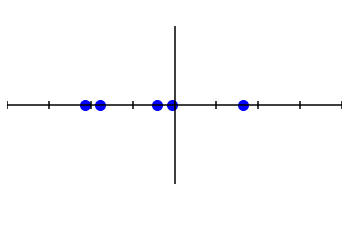

In [4]:
scatter(x, 0.5, 'blue')

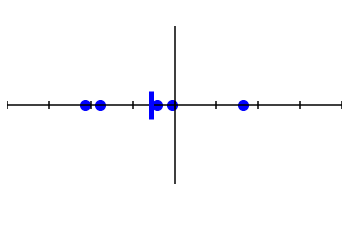

In [5]:
scatter(x, 0.5, 'blue', x_bar)

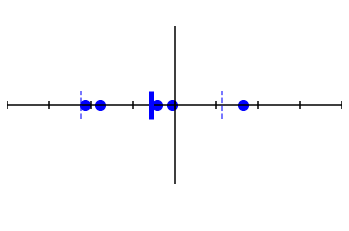

In [6]:
scatter(x, 0.5, 'blue', x_bar, width)

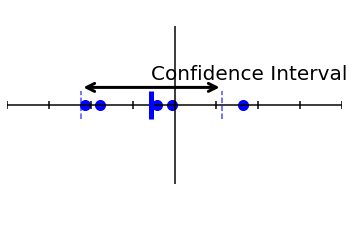

In [7]:
scatter(x, 0.5, 'blue', x_bar, width, 'Confidence Interval')

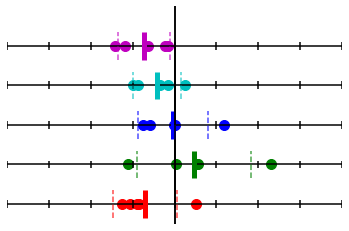

In [8]:
for i, color in zip(range(5), ['r','g','b','c','m']):
    x = np.random.normal(size=(5,))
    x_bar = x.mean()
    s = x.std()
    n = x.shape[0]
    t_star = stats.t(n-1).ppf(0.975)
    width = t_star * s / np.sqrt(n) 

    y_center = i * 0.2
    scatter(x, y_center, color, x_bar, width)